# Assignment 3: Linear Regression

# One variable

Module imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Function to read the file and return X, y, no. of training data and no. of features

In [2]:
def read_file(file_name, delimiter):
    points = np.loadtxt(file_name, delimiter=delimiter)
    m = points.shape[0]
    n = points.shape[1] - 1 # no. of features
    X = points[..., 0:n]
    y = points[..., n:]
    return X, y, m, n

Functions needed to implement gradient descent

In [3]:
def cost(X, y, theta):
    # cost = (1/2m) ((Xtheta- y)T * (Xtheta - y))
    m = X.shape[0]
    ans = np.matmul(X, theta)
    ans = ans - y
    ans = np.matmul(ans.T, ans)
    return (1 / (2 * m)) * ans

def gradient(X, y, theta):
    # gradient = (1/m) * ((XT) * (Xtheta - y))
    ans = np.matmul(X, theta) - y
    ans = np.matmul(X.T, ans)
    m = X.shape[0]
    return (1 / m) * ans

def gradient_descent(X, y, theta, iters=1500, alpha=0.01):
    for i in range(iters):
        theta = theta - alpha * gradient(X, y, theta)
    return theta

## Method 1: Gradient descent

In [4]:
# in order to run gradient descent, we need to add a x0 feature to features matrix 
# it is a column with all values equal to 1

X, y, m, n = read_file('ex1data1.txt', ',')

x0s = np.ones((m, 1))
gd_X = np.append(x0s, X, axis=1)

# now we have n+1 features:
theta = np.zeros((n+1, 1))

theta = gradient_descent(gd_X, y, theta)

### Gradient Descent - Plot

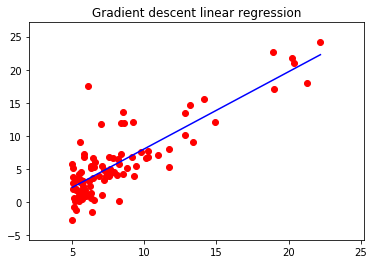

In [5]:
x_min, x_max = X[..., 0].ravel().min(), X[..., 0].ravel().max()
y_min, y_max = y[..., 0].ravel().min(), y[..., 0].ravel().max()
plt.xlim(x_min - 3, x_max + 3)
plt.ylim(y_min - 3, y_max + 3)
plt.title('Gradient descent linear regression')

# scatter the points
plt.scatter(X[..., 0].ravel(), y[..., 0].ravel(), c='r')

# plot the line
# 1s are added as x0
xs = [x_min, x_max]
ys = [np.dot([1, x_min], theta), np.dot([1, x_max], theta)]
plt.plot(xs, ys, c='b')
plt.show()

## Method 2: Scikit learn

In [6]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Scikit learn - Plot

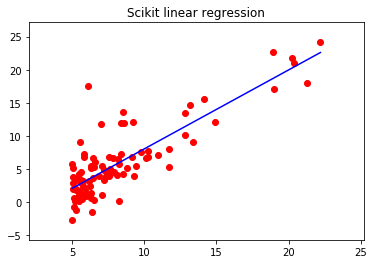

In [7]:
plt.xlim(x_min - 3, x_max + 3)
plt.ylim(y_min - 3, y_max + 3)
plt.title('Scikit linear regression')

# scatter the points
plt.scatter(X[..., 0].ravel(), y[..., 0].ravel(), c='r')

# plot the line
# 1s are added as x0
xs = [x_min, x_max]
ys = [regressor.predict(x_min)[0][0], regressor.predict(x_max)[0][0]]
plt.plot(xs, ys, c='b')
plt.show()